In [1]:
#ESTE TRABALHO TEM COMO OBJETIVO ENCONTRAR QUAL A MELHOR IDADE PARA SE INICIAR UMA CAMPANHA DE PREVENÇÃO AO VÍCIO DE ALCOOL.
#ANALISANDO O DATASET PENSE 2015 PODEMOS, PRIMEIRAMENTE, CRIAR UM CLASSIFICADOR DE PADRÕES PARA MAPEAR OS ALUNOS QUE 
#NÃO RESPONDERAM A PERGUNTA VB05002(experimentou alcool ou não), ou seja, com VB05002 = 99

In [8]:
import pandas as pd
import numpy as np
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    'RF': RandomForestClassifier(n_estimators=100),
    #'KNN': KNeighborsClassifier(),
    #'DTREE': DecisionTreeClassifier(),
    #'GNB': GaussianNB(),
    #'LRG': LogisticRegression(),
    #'ABC': AdaBoostClassifier(),
    #'MLP': MLPClassifier(max_iter=500,alpha=1),
    #'KDA': QuadraticDiscriminantAnalysis(),
    #'SVM1': SVC(kernel='linear',C=0.025),
    #'SVM2': SVC(gamma=2, C=1),
    #'GPC': GaussianProcessClassifier(1.0 * RBF(1.0))
}
def classifica(X,y):

    nfolds = 10 #Cross Validation a 10 pastas.
    kf = KFold(n_splits=nfolds,shuffle=True)
    X = normalize(X)
    dfcol = ['FOLD','ALGORITHM','PRE','REC','SPE','F1','GEO','IBA','AUC','ACC']
    df = pd.DataFrame(columns=dfcol)
    i = 0
    fold = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index],y[test_index]
        for name, clf in classifiers.items():
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            res = classification_report_imbalanced(y_test, y_pred)
            aux = res.split()
            score = aux[-7:-1]
            df.at[i,'FOLD'] = fold
            df.at[i,'ALGORITHM'] = name
            df.at[i,'PRE'] = score[0]
            df.at[i, 'REC'] = score[1]
            df.at[i, 'SPE'] = score[2]
            df.at[i, 'F1'] = score[3]
            df.at[i, 'GEO'] = score[4]
            df.at[i, 'IBA'] = score[5]
            df.at[i, 'ACC'] = accuracy_score(y_test,y_pred)
            df.at[i, 'AUC'] = roc_auc_score(y_test,y_pred)
            i = i + 1
            print(str(fold) + ' ' + str(name))
        fold = fold + 1
    df.to_csv('pode_experimentar_alcool.csv',index=False)
    
    t = pd.Series(data=np.arange(0, df.shape[0],1))
    dfr = pd.DataFrame(columns=['ALGORITHM','PRE','REC','SPE','F1','GEO','IBA','AUC','ACC'],
                       index=np.arange(0, int(t.shape[0] / nfolds)))
    df_temp = df.groupby(by=['ALGORITHM'])
    idx = dfr.index.values
    i = idx[0]
    for name, group in df_temp:
        group = group.reset_index()
        dfr.at[i,'ALGORITHM'] = group.loc[0,'ALGORITHM']
        dfr.at[i,'PRE'] = group['PRE'].astype(float).mean()
    
        dfr.at[i, 'REC'] = group['REC'].astype(float).mean()
        dfr.at[i, 'SPE'] = group['SPE'].astype(float).mean()
        dfr.at[i, 'F1'] = group['F1'].astype(float).mean()
        dfr.at[i, 'GEO'] = group['GEO'].astype(float).mean()
        dfr.at[i, 'IBA'] = group['IBA'].astype(float).mean()
        dfr.at[i, 'ACC'] = group['ACC'].astype(float).mean()
        dfr.at[i, 'AUC'] = group['AUC'].astype(float).mean()
        i = i + 1
    
    dfr.to_csv('media_pode_experimentar_alcool.csv',index=False)

In [9]:
columns = [
'VB01001',
'VB01002',
'VB01003',
'VB01021',
'VB01022',
'VB01023',
'VB01024',
'VB01025',
'VB01026',
'VB01006',
'VB01007',
'VB01010A',
'VB01014',
'VB01015A',
'VB01016',
'VB01017',
'VB01018',
'VB01008A',
'VB01011',
'VB01012',
'VB02019A',
'VB02017A',
'VB02024',
'VB03003A',
'VB03006A',
'VB03007',
'VB03011A',
'VB03009A',
'VB03010A',
'VB04003',
'VB04009',
'VB04011',
'VB04005',
'VB04006A',
'VB05004',
'VB05005',
'VB05006A',
'VB05007',
'VB05009',
'VB05010',
'VB06003A',
'VB06004A',
'VB06005A',
'VB06006',
'VB07001',
'VB07002',
'VB07003',
'VB07004',
'VB07007',
'VB07008',
'VB07009',
'VB07010',
'VB12001',
'VB12002',
'VB12003',
'VB08011',
'VB08003A',
'VB10001A',
'VB09001',
'VB09002',
'VB09003',
'VB09010',
'VB09011',
'VB09012',
'VB09016',
'VB0901701',
'VB0901702',
'VB0901703',
'VB0901704',
'VB0901705',
'VB0901706',
'VB11006',
'VB11007',
'VB11001',
'VB11002',
'VB11004A',
'VB11005',
#'VB04001',
#'VB04002',
'VB05002',
#'VB05003',
#'VB06001',
#'VB06002',
#'VB08001',
#'VB08002',
#'VB08013'
]

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('PENSE_AMOSTRA1_ALUNO.CSV',sep=';') #le arquivo
df = df[columns] #pego somente as colunas de interesse
df = df.reset_index()#refaço o index
df.drop('index',inplace=True,axis=1)#tiro uma coluna
print(df.shape)
#retira os alunos que não responderam se já experimentaram alcool
df = df[df.VB05002 != 99]

(102072, 86)


In [12]:
#Agora tenho os dados necessários para fazer um classificador de padrões (experimentou alcool ou não)
#Este classificador pode ser utilizado para classificar os alunos que tiveram VB05002 == 99
#Não vou realizar esta tarefa de classificação dos alunos que não responderam. Deixo esta tarefa a quem quiser 
#encarar este desafio.
X = df.values
y = X[:,-1]
y = y.reshape(len(y), 1)
X = X[:,0:-1]

In [13]:
classifica(X,y)

/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


6 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8 RF


/home/itwv/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


9 RF


In [14]:
resultado_classificador = pd.read_csv('media_pode_experimentar_alcool.csv')

In [16]:
#Podemos observar abaixo que o classificador está com uma ótima acurácia ACC e um ótimo AUC, próximos a 100%

In [15]:
print(resultado_classificador)

  ALGORITHM   PRE    REC    SPE     F1    GEO    IBA       AUC       ACC
0        RF  0.98  0.978  0.978  0.978  0.978  0.951  0.976152  0.976984


In [17]:
#Agora vamos analisar as principais características dos alunos que vao experimentar alcool para podermos tomar alguma ação para evitar isso.

In [18]:
#VB05003 - Que idade você tinha quando tomou a primeira dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)

In [19]:
columns = [
'VB01001',
'VB01002',
'VB01003',
'VB01021',
'VB01022',
'VB01023',
'VB01024',
'VB01025',
'VB01026',
'VB01006',
'VB01007',
'VB01010A',
'VB01014',
'VB01015A',
'VB01016',
'VB01017',
'VB01018',
'VB01008A',
'VB01011',
'VB01012',
'VB02019A',
'VB02017A',
'VB02024',
'VB03003A',
'VB03006A',
'VB03007',
'VB03011A',
'VB03009A',
'VB03010A',
'VB04003',
'VB04009',
'VB04011',
'VB04005',
'VB04006A',
'VB05004',
'VB05005',
'VB05006A',
'VB05007',
'VB05009',
'VB05010',
'VB06003A',
'VB06004A',
'VB06005A',
'VB06006',
'VB07001',
'VB07002',
'VB07003',
'VB07004',
'VB07007',
'VB07008',
'VB07009',
'VB07010',
'VB12001',
'VB12002',
'VB12003',
'VB08011',
'VB08003A',
'VB10001A',
'VB09001',
'VB09002',
'VB09003',
'VB09010',
'VB09011',
'VB09012',
'VB09016',
'VB0901701',
'VB0901702',
'VB0901703',
'VB0901704',
'VB0901705',
'VB0901706',
'VB11006',
'VB11007',
'VB11001',
'VB11002',
'VB11004A',
'VB11005',
'VB04001',
'VB04002',
'VB05002',
'VB05003',
'VB06001',
'VB06002',
'VB08001',
'VB08002',
'VB08013'
]


In [20]:
df = pd.read_csv('PENSE_AMOSTRA1_ALUNO.CSV',sep=';') #le arquivo
df = df[columns] #pego somente as colunas de interesse
df = df.reset_index()#refaço o index
df.drop('index',inplace=True,axis=1)#tiro uma coluna
#retira os alunos que não responderam se já experimentaram alcool
df = df[df.VB05002 != 99]
#retira os alunos que não responderam a idade em que experimentaram alcool
df = df[df.VB05003 != 99]
#retira os alunos que nunca tomaram bebida alcoolica
df = df[df.VB05003 != 1]

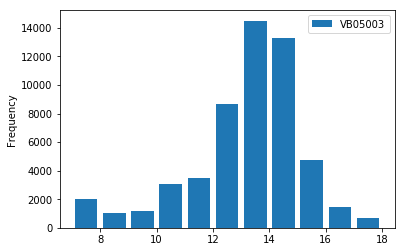

In [21]:
df[['VB05003']].plot(kind='hist',bins=[7,8,9,10,11,12,13,14,15,16,17,18],rwidth=0.8)
plt.show()

In [22]:
df.VB05003.describe()

count    54077.000000
mean        12.683877
std          2.014689
min          7.000000
25%         12.000000
50%         13.000000
75%         14.000000
max         18.000000
Name: VB05003, dtype: float64

In [23]:
#Observando o gráfico acima, percebemos que para evitarmos que os alunos dêem o primeiro gole,
#deve-se fazer campanhas para as crianças a partir dos 10 anos de idade.
#Caso não seja possível por motivos de custo (todo o Brasil), o recomendável seria fazer a partir dos 12 anos.
#Na média, os alunos tomam a primeira dose aos 12 anos de idade.
#Podemos observar que São Paulo e Brasil apresentaram os mesmos resultados.

In [24]:
#VB06002 - Que idade você tinha quando usou droga como maconha, cocaína, crack, cola, loló, lança-perfume, ecstasy, oxy ou outra, pela primeira vez?

In [25]:
df = pd.read_csv('PENSE_AMOSTRA1_ALUNO.CSV',sep=';') #le arquivo
df = df[columns] #pego somente as colunas de interesse
df = df.reset_index()#refaço o index
df.drop('index',inplace=True,axis=1)#tiro uma coluna
#retiro os que não informaram
df = df[df.VB06002 != 99]
#retiro os que pularam
df = df[df.VB06002 != -1]

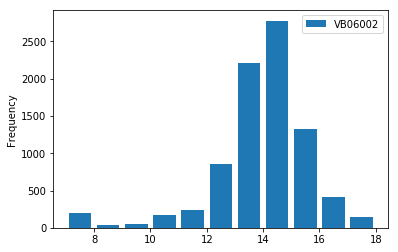

In [26]:
df[['VB06002']].plot(kind='hist',bins=[7,8,9,10,11,12,13,14,15,16,17,18],rwidth=0.8)
plt.show()

In [27]:
df.VB06002.describe()

count    8434.000000
mean       13.444036
std         1.735576
min         7.000000
25%        13.000000
50%        14.000000
75%        14.000000
max        18.000000
Name: VB06002, dtype: float64

In [28]:
#Observando o gráfico acima, devemos fazer campanhas de prevenção contra as drogas para os estudantes a partir dos 12 anos
#de idade. Na média, os alunos começam a utilizar drogas a partir dos 13 anos de idade.

In [29]:
df = pd.read_csv('PENSE_AMOSTRA1_ALUNO.CSV',sep=';') #le arquivo
df = df[columns] #pego somente as colunas de interesse
df = df.reset_index()#refaço o index
df.drop('index',inplace=True,axis=1)#tiro uma coluna
#retiro os que não informaram
df = df[df.VB08002 != 99]
#retiro os que pularam
df = df[df.VB08002 != -1]

In [30]:
#VB08002 - Que idade você tinha quando teve relação sexual (transou) pela primeira vez?

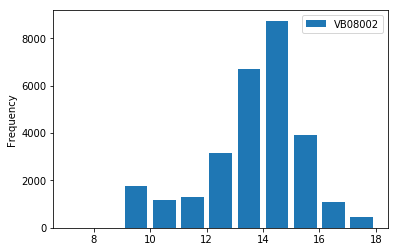

In [31]:
df[['VB08002']].plot(kind='hist',bins=[7,8,9,10,11,12,13,14,15,16,17,18],rwidth=0.8)
plt.show()

In [32]:
df.VB08002.describe()

count    28346.000000
mean        13.190186
std          1.773640
min          9.000000
25%         12.000000
50%         14.000000
75%         14.000000
max         18.000000
Name: VB08002, dtype: float64

In [33]:
#Deve-se iniciar campanhas sobre o uso de preservativos e métodos anticoncepcionais a partir dos 9 anos de idade. Como
#na cidade de São Paulo.

In [34]:
df = pd.read_csv('PENSE_AMOSTRA1_ALUNO.CSV',sep=';') #le arquivo
df = df[columns] #pego somente as colunas de interesse
df = df.reset_index()#refaço o index
df.drop('index',inplace=True,axis=1)#tiro uma coluna
#retiro os que não informaram
df = df[df.VB09002 != 99]
print(df.shape)
#retiro os que não faltaram
df = df[df.VB09002 != 1]

(101257, 86)


In [35]:
#VB09002 - NOS ÚLTIMOS 30 DIAS, em quantos dias você não foi à escola porque não se sentia seguro na escola?
#A resposta a esta pergunta pode indicar sérios problemas psicológicos como depressão e transtornos

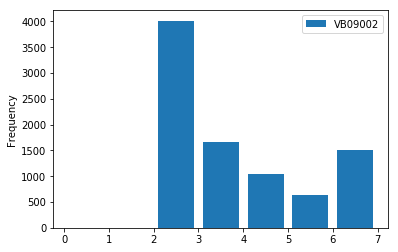

In [36]:
df[['VB09002']].plot(kind='hist',bins=[0,1,2,3,4,5,6,7],rwidth=0.8)
plt.show()

In [37]:
df.VB09002.describe()

count    8871.000000
mean        3.317552
std         1.510298
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: VB09002, dtype: float64

In [76]:
#Dos 102072 alunos, 174 tiveram algum problema de medo nas dependencias da escola (pode indicar agressão, assédio, etc)